In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#from 3.4, percent change function
def pct_chg_calc(df,colname):
    #takes the dataset and the respective column and calculates the difference between two adjacent rows and divides by the previous
    return df[colname].diff()/df[colname].shift()

In [6]:
#from 3.4, apply percent change function to each row of each column and name new columns accordingly
def norm_df(df):
    #create new dataframe to store results
    normdf = pd.DataFrame()
    #take the date column from the original
    normdf[df.columns[0]] = df[df.columns[0]].copy()
    #loop through each column with the percent change function defined above
    for column in df.columns[1:]:
        newcol = "{}_per_change".format(column)
        normdf[newcol] = pct_chg_calc(df,column)
        #delete first row in results dataframe as there is no previous value to calculate a percent change frome
        normdf = normdf.iloc[1:]
    return normdf

In [7]:
#read in data
df = pd.read_csv('3.2_linear_interpolation.csv')
df['DATE']= pd.to_datetime(df['DATE'])
#normalize values
normdf = norm_df(df)

In [82]:
def multiple_linear_regression(x, y,regtype = 'multiple'): 
    
    #convert the df input to a matrix
    x = np.asarray(x.values.tolist())
    if regtype == 'single':
        x = x.reshape(len(x),1)
    #add vector of ones to the x matrix for beta zero
    x = np.concatenate((x,np.ones((len(x),1))), axis = 1)
    #convert df column input of dependent variable to a numpy array
    y.to_numpy()
    
    #use the derivation of the multiple linear regression coefficient estimates from lecture
    beta_hat = np.dot(np.linalg.inv(np.dot(np.transpose(x),x)),np.dot(np.transpose(x),y))
    
    #multiple the coefficient estimates and the x matrix to obtain predicted values of y
    y_pred = np.dot(x,beta_hat)
    
    #use the sse derivation from lecture
    sse = np.dot(np.transpose(y - y_pred),(y - y_pred))
    
    return (beta_hat,y_pred,sse)

In [85]:
#define the independent variables to be included in each regression model
x1 = normdf[['US_Dollar_Purchasing_power_per_change']].copy()
x2 = normdf[['US_Dollar_Purchasing_power_per_change','CPI_Energy_per_change']].copy()
x3 = normdf[['US_Dollar_Purchasing_power_per_change','CPI_Energy_per_change','Monthly_Housing_Cost_per_change']].copy()
x4 = normdf[['US_Dollar_Purchasing_power_per_change','CPI_Energy_per_change','Rent_of_Primary_residence_per_change']].copy()
y = normdf['CPI_all_items_per_change']

In [113]:
#create a function to plot the original data against the predicted data
def plot_reg_line(y,y_pred,sse,title):
    plt.scatter(y_pred, y, alpha=0.5)
    plt.xlabel('CPI_all_items_per_change Predicted')
    plt.ylabel('CPI_all_items_per_change Original')
    plt.title("Predicted Data vs Original Data - {}".format(title))
    plt.savefig("5_3_4_{}.jpg".format(title))
    plt.show()

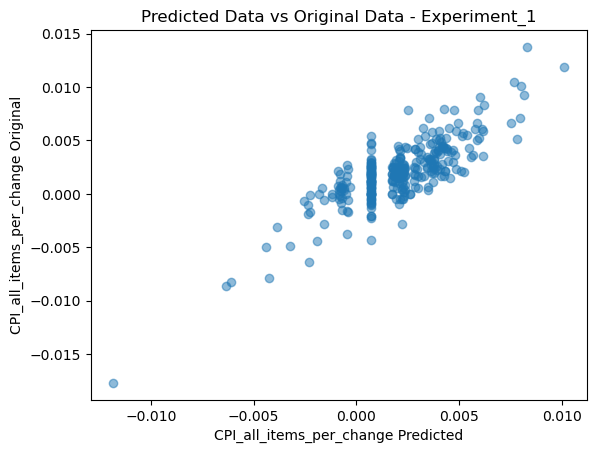

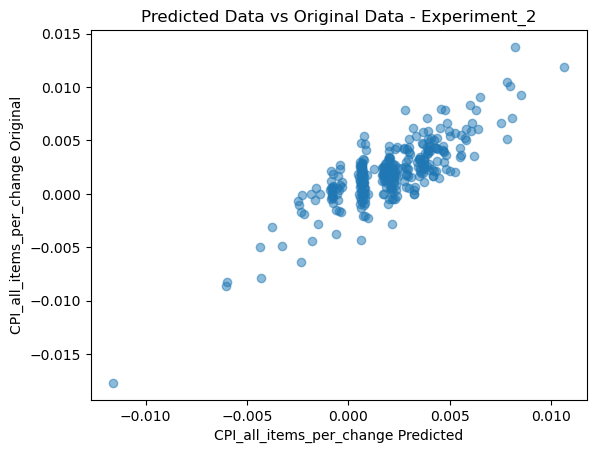

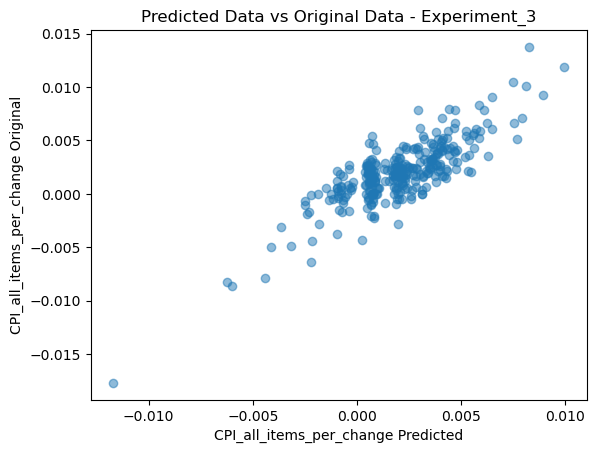

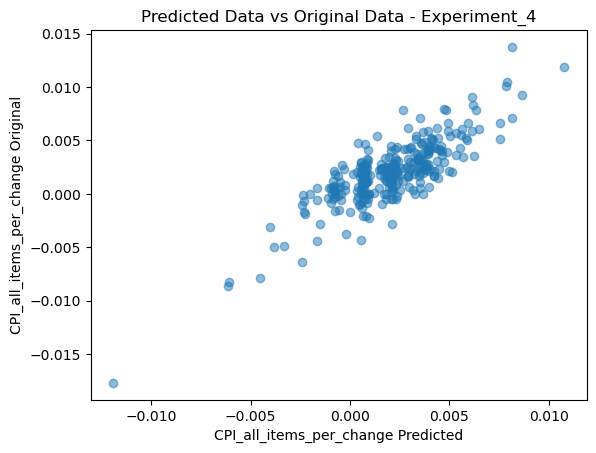

In [114]:
#plot each model's fit against the original data
exper = ['Experiment_1','Experiment_2','Experiment_3', 'Experiment_4']
dataexper = [x1,x2,x3,x4]
for i in range(0,4):
    plot_reg_line(y,multiple_linear_regression(dataexper[i], y)[1],multiple_linear_regression(dataexper[i], y)[2], exper[i])

In [92]:
#create a list for the sse values
sse = []
for i in [x1,x2,x3,x4]:
    sse.append(multiple_linear_regression(i, y)[2])

In [94]:
sse
#The model with the most independent variables achieved the smallest sse. However, this does not mean that this model fits the data the best.
#The differences between the sses are extremely small

[0.0009036778050041162,
 0.0008980628139285755,
 0.0008883376198244485,
 0.0008882828978449367]